<a href="https://colab.research.google.com/github/youyeon11/class_ai4dl/blob/main/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

#using concatenate function

train_images_with_noise_channels = np.concatenate( #add noise channel
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate( #add zero channel
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 2s 0us/step


In [2]:
train_images.shape

(60000, 784)

In [3]:
#random 생성(noise channel)
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [4]:
#784 dimensional noisy data at training data
np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1).shape

(60000, 1568)

In [5]:
#noise channel에 대한 확인 (by indexing 첫번째)
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.78869429, 0.00545323,
       0.48503252])

In [6]:
#zeros에 대하여 체크(0에 대해서 추가)
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"), #이 unit에는 input 사이즈를 입력해야함
        layers.Dense(10, activation="softmax") #이 unit에는 output 사이즈를 입력해야함
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#add validation accuracy of original data for mnist data

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3473 - accuracy: 0.1049 - val_loss: 2.3020 - val_accuracy: 0.1126
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1110 - val_loss: 2.3015 - val_accuracy: 0.1124
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 2.3018 - accuracy: 0.1104 - val_loss: 2.3027 - val_accuracy: 0.1046
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3020 - accuracy: 0.1104 - val_loss: 2.3021 - val_accuracy: 0.1121
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3023 - accuracy: 0.1102 - val_loss: 2.3023 - val_accuracy: 0.1131
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3020 - accuracy: 0.1104 - val_loss: 2.3033 - val_accuracy: 0.1112
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3015 - accuracy: 0.1134 - val_loss: 2.3060 - val_accuracy: 0.1059
Epoch 

**Plotting a validation accuracy comparison**

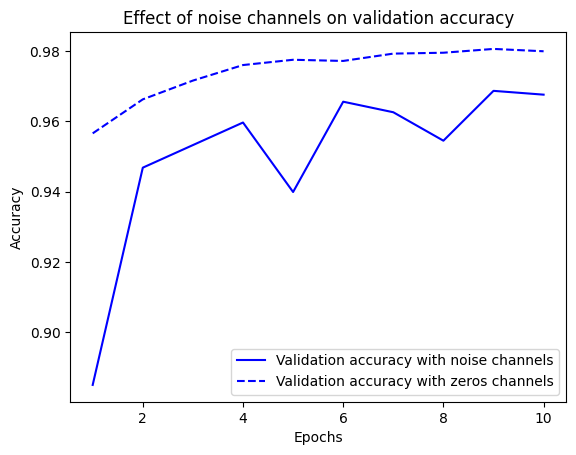

In [8]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

w6 practice
- From Training the sme model on MNIST data with noise channels or all-zero channels Add validation accuracy of original data for mnist data.

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"), #이 unit에는 input 사이즈를 입력해야함
        layers.Dense(10, activation="softmax") #이 unit에는 output 사이즈를 입력해야함
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

#add validation accuracy of original data for mnist data

model3 = get_model()
history_noise = model3.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model3 = get_model()
history_zeros = model3.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model3 = get_model()
history_original=model3.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3542 - accuracy: 0.1057 - val_loss: 2.3018 - val_accuracy: 0.1131
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3020 - accuracy: 0.1104 - val_loss: 2.3085 - val_accuracy: 0.0976
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1107 - val_loss: 2.3033 - val_accuracy: 0.1081
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.1115 - val_loss: 2.3014 - val_accuracy: 0.1123
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3015 - accuracy: 0.1160 - val_loss: 2.3046 - val_accuracy: 0.1083
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3001 - accuracy: 0.1152 - val_loss: 2.3081 - val_accuracy: 0.1043
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2971 - accuracy: 0.1205 - val_loss: 2.3103 - val_accuracy: 0.1036
Epoch 

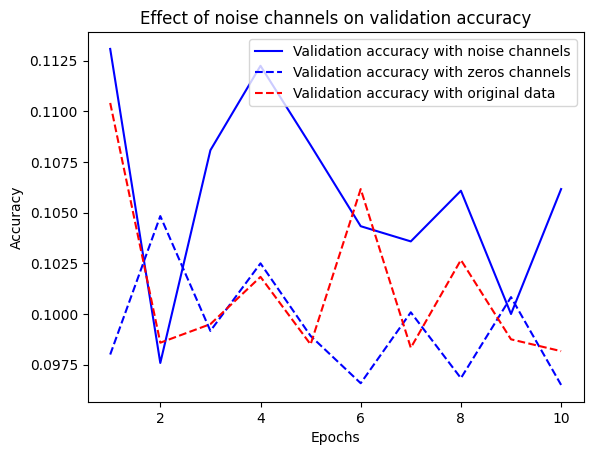

In [30]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original=history_original.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, 'r--',
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

w6 practice

- Fitting a MNIST model with randomly shuffled labels. Visualize training accuracy and validation accuracy.

In [22]:
##w6 practice

#importance of generalization power
#shuffle하든 말든 상관 없다
# Fitting a MNIST model with randomly shffled labels

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model2.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3158 - accuracy: 0.1051 - val_loss: 2.3055 - val_accuracy: 0.1027
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2987 - accuracy: 0.1199 - val_loss: 2.3142 - val_accuracy: 0.1024
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2906 - accuracy: 0.1270 - val_loss: 2.3177 - val_accuracy: 0.1034
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2771 - accuracy: 0.1410 - val_loss: 2.3337 - val_accuracy: 0.1002
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2622 - accuracy: 0.1531 - val_loss: 2.3404 - val_accuracy: 0.1025
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2428 - accuracy: 0.1679 - val_loss: 2.3535 - val_accuracy: 0.1007
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2193 - accuracy: 0.1793 - val_loss: 2.3684 - val_accuracy: 0.0994

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3163 - accuracy: 0.1021 - val_loss: 2.3060 - val_accuracy: 0.1037
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2991 - accuracy: 0.1181 - val_loss: 2.3122 - val_accuracy: 0.1010
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2906 - accuracy: 0.1277 - val_loss: 2.3211 - val_accuracy: 0.0995
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.2782 - accuracy: 0.1390 - val_loss: 2.3238 - val_accuracy: 0.1002
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2625 - accuracy: 0.1519 - val_loss: 2.3389 - val_accuracy: 0.0974
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2426 - accuracy: 0.1658 - val_loss: 2.3527 - val_accuracy: 0.0997
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2176 - accuracy: 0.1829 - val_loss: 2.3660 - val_accuracy: 0.0992
Epoch 

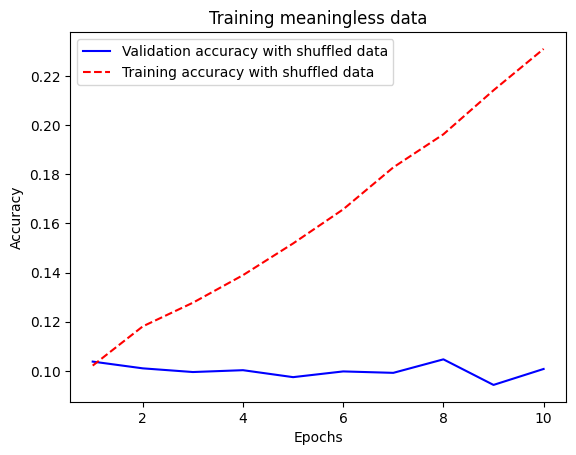

In [26]:
#Visualize training accuracy and validation accuracy

model2 = get_model()
history_random = model2.fit(
    train_images, random_train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


import matplotlib.pyplot as plt
val_acc_random = history_random.history["val_accuracy"]
train_acc_random = history_random.history['accuracy'] #history function: ['accuracy', 'loss','val_accuracy','val_loss']
epochs = range(1, 11)
plt.plot(epochs, val_acc_random, "b-",
         label="Validation accuracy with shuffled data")
plt.plot(epochs, train_acc_random, 'r--',
         label='Training accuracy with shuffled data')
plt.title("Training meaningless data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model2.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

model2 = get_model()
history_random = model2.fit(
    train_images, random_train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


import matplotlib.pyplot as plt
val_acc_random = history_random.history["val_accuracy"]
train_acc_random = history_random.history['accuracy'] #history function: ['accuracy', 'loss','val_accuracy','val_loss']
epochs = range(1, 11)
plt.plot(epochs, val_acc_random, "b-",
         label="Validation accuracy with shuffled data")
plt.plot(epochs, train_acc_random, 'r--',
         label='Training accuracy with shuffled data')
plt.title("Training meaningless data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), #too high learining rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 847.4384 - accuracy: 0.3195 - val_loss: 2.5229 - val_accuracy: 0.2633
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 2.7980 - accuracy: 0.2186 - val_loss: 2.2109 - val_accuracy: 0.2133
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5808 - accuracy: 0.1981 - val_loss: 2.2178 - val_accuracy: 0.2224
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4878 - accuracy: 0.1936 - val_loss: 2.1662 - val_accuracy: 0.2159
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5417 - accuracy: 0.2115 - val_loss: 2.1757 - val_accuracy: 0.2138
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3555 - accuracy: 0.2051 - val_loss: 2.9618 - val_accuracy: 0.2129
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3181 - accuracy: 0.2026 - val_loss: 2.1269 - val_accuracy: 0.2062
Epoc

**The same model with a more appropriate learning rate**

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), #appropriate learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3162 - accuracy: 0.9145 - val_loss: 0.1861 - val_accuracy: 0.9459
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1242 - accuracy: 0.9659 - val_loss: 0.1849 - val_accuracy: 0.9553
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1023 - accuracy: 0.9730 - val_loss: 0.1643 - val_accuracy: 0.9668
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0778 - accuracy: 0.9796 - val_loss: 0.1529 - val_accuracy: 0.9696
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9826 - val_loss: 0.1657 - val_accuracy: 0.9730
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0615 - accuracy: 0.9855 - val_loss: 0.1649 - val_accuracy: 0.9744
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0513 - accuracy: 0.9875 - val_loss: 0.2050 - val_accuracy: 0.9721
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [12]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6716 - accuracy: 0.8324 - val_loss: 0.3602 - val_accuracy: 0.9039
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.9026 - val_loss: 0.3085 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3177 - accuracy: 0.9116 - val_loss: 0.2910 - val_accuracy: 0.9181
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.9159 - val_loss: 0.2832 - val_accuracy: 0.9210
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2920 - accuracy: 0.9186 - val_loss: 0.2778 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2851 - accuracy: 0.9209 - val_loss: 0.2754 - val_accuracy: 0.9238
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2805 - accuracy: 0.9224 - val_loss: 0.2730 - val_accuracy: 0.9250
Epoch 

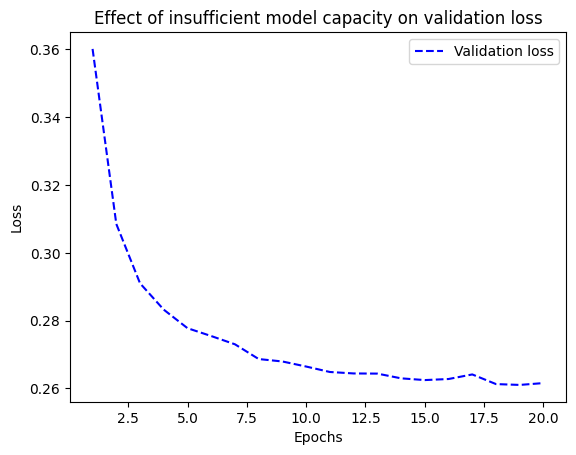

In [13]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [14]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3597 - accuracy: 0.8985 - val_loss: 0.2149 - val_accuracy: 0.9346
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1606 - accuracy: 0.9516 - val_loss: 0.1339 - val_accuracy: 0.9613
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1134 - accuracy: 0.9662 - val_loss: 0.1116 - val_accuracy: 0.9657
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9742 - val_loss: 0.1006 - val_accuracy: 0.9692
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9790 - val_loss: 0.0936 - val_accuracy: 0.9723
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0575 - accuracy: 0.9818 - val_loss: 0.0961 - val_accuracy: 0.9722
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0938 - val_accuracy: 0.9735
Epoch 

w6 practice
- Visualize validation loss of the original model, model with lower capacity and model with larger capacity

In [33]:
#small model
model1 = keras.Sequential([layers.Dense(10, activation="softmax")])
model1.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model1.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3280 - accuracy: 0.1029 - val_loss: 2.3236 - val_accuracy: 0.1047
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3115 - accuracy: 0.1076 - val_loss: 2.3235 - val_accuracy: 0.1008
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3056 - accuracy: 0.1161 - val_loss: 2.3217 - val_accuracy: 0.1007
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 2.3013 - accuracy: 0.1189 - val_loss: 2.3252 - val_accuracy: 0.1033
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 2.2985 - accuracy: 0.1236 - val_loss: 2.3226 - val_accuracy: 0.1038
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2963 - accuracy: 0.1231 - val_loss: 2.3222 - val_accuracy: 0.1041
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 2.2938 - accuracy: 0.1261 - val_loss: 2.3218 - val_accuracy: 0.1034
Epoch 

In [34]:
#larger model
model2 = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model2.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model2.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 2.3072 - accuracy: 0.1045 - val_loss: 2.3041 - val_accuracy: 0.1026
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3013 - accuracy: 0.1112 - val_loss: 2.3047 - val_accuracy: 0.1056
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2985 - accuracy: 0.1157 - val_loss: 2.3053 - val_accuracy: 0.1075
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2946 - accuracy: 0.1213 - val_loss: 2.3086 - val_accuracy: 0.1067
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2891 - accuracy: 0.1280 - val_loss: 2.3140 - val_accuracy: 0.1008
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2829 - accuracy: 0.1359 - val_loss: 2.3201 - val_accuracy: 0.1015
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2745 - accuracy: 0.1422 - val_loss: 2.3272 - val_accuracy: 0.1017
Epoch 

In [37]:
#original model
model3=keras.Sequential([
    layers.Dense(30, activation='relu'),
    layers.Dense(30, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model3.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_model=model3.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 2.3037 - accuracy: 0.1051 - val_loss: 2.3034 - val_accuracy: 0.1090
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1109 - val_loss: 2.3035 - val_accuracy: 0.1114
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2998 - accuracy: 0.1117 - val_loss: 2.3044 - val_accuracy: 0.1056
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 2.2982 - accuracy: 0.1143 - val_loss: 2.3040 - val_accuracy: 0.1107
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 2.2960 - accuracy: 0.1167 - val_loss: 2.3052 - val_accuracy: 0.1090
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2935 - accuracy: 0.1193 - val_loss: 2.3080 - val_accuracy: 0.1047
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2903 - accuracy: 0.1241 - val_loss: 2.3137 - val_accuracy: 0.1051
Epoch 

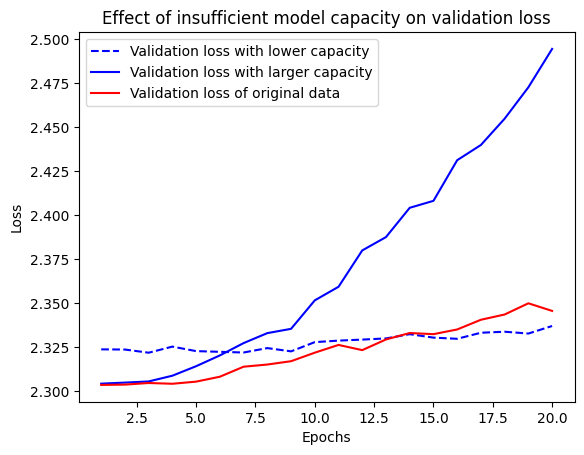

In [38]:
import matplotlib.pyplot as plt
val_loss1 = history_small_model.history["val_loss"]
val_loss2 = history_large_model.history['val_loss']
val_loss3=history_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss1, "b--",
         label="Validation loss with lower capacity")
plt.plot(epochs, val_loss2, 'b-',
         label='Validation loss with larger capacity')
plt.plot(epochs, val_loss3, 'r-',
         label='Validation loss of original data')
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5283 - accuracy: 0.7714 - val_loss: 0.3982 - val_accuracy: 0.8726
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3298 - accuracy: 0.8949 - val_loss: 0.3139 - val_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2494 - accuracy: 0.9183 - val_loss: 0.3080 - val_accuracy: 0.8753
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1974 - accuracy: 0.9363 - val_loss: 0.2839 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1636 - accuracy: 0.9479 - val_loss: 0.2756 - val_accuracy: 0.8930
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1410 - accuracy: 0.9548 - val_loss: 0.3161 - val_accuracy: 0.8760
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1234 - accurac

**Version of the model with lower capacity**

In [16]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6254 - accuracy: 0.6689 - val_loss: 0.5655 - val_accuracy: 0.7084
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5248 - accuracy: 0.7819 - val_loss: 0.5241 - val_accuracy: 0.7630
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4761 - accuracy: 0.8438 - val_loss: 0.4968 - val_accuracy: 0.8686
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4414 - accuracy: 0.8861 - val_loss: 0.4855 - val_accuracy: 0.8369
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.4163 - accuracy: 0.9073 - val_loss: 0.4789 - val_accuracy: 0.8463
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3941 - accuracy: 0.9236 - val_loss: 0.4657 - val_accuracy: 0.8651
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3754 - accuracy: 0.9366 - val_loss: 0.4547 - val_accuracy: 0.8772
Epoch 8/20
30

**Version of the model with higher capacity**

In [17]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5750 - accuracy: 0.7069 - val_loss: 0.3600 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3219 - accuracy: 0.8686 - val_loss: 0.4060 - val_accuracy: 0.8173
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2336 - accuracy: 0.9050 - val_loss: 0.2683 - val_accuracy: 0.8915
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1895 - accuracy: 0.9271 - val_loss: 0.2881 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1392 - accuracy: 0.9457 - val_loss: 0.4603 - val_accuracy: 0.8440
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1085 - accuracy: 0.9601 - val_loss: 0.3325 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0850 - accuracy: 0.9735 - val_loss: 0.3512 - val_accuracy: 0.8829
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [18]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.6190 - accuracy: 0.7668 - val_loss: 0.5081 - val_accuracy: 0.8254
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4156 - accuracy: 0.8902 - val_loss: 0.4138 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3439 - accuracy: 0.9134 - val_loss: 0.3868 - val_accuracy: 0.8781
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3018 - accuracy: 0.9263 - val_loss: 0.3668 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2824 - accuracy: 0.9308 - val_loss: 0.3582 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2653 - accuracy: 0.9380 - val_loss: 0.3612 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2573 - accuracy: 0.9412 - val_loss: 0.3620 - val_accuracy: 0.8865
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [19]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.6389 - accuracy: 0.6284 - val_loss: 0.5305 - val_accuracy: 0.8431
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5191 - accuracy: 0.7592 - val_loss: 0.4192 - val_accuracy: 0.8614
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4262 - accuracy: 0.8250 - val_loss: 0.3492 - val_accuracy: 0.8729
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3608 - accuracy: 0.8617 - val_loss: 0.3096 - val_accuracy: 0.8761
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3281 - accuracy: 0.8821 - val_loss: 0.2839 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2749 - accuracy: 0.9060 - val_loss: 0.2713 - val_accuracy: 0.8919
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2473 - accuracy: 0.9167 - val_loss: 0.2717 - val_accuracy: 0.8912
Epoch 8/20
30

## Summary